<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W5D2_ExercisesXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercise 1**

In [1]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d shariful07/student-mental-health

  0% 0.00/1.62k [00:00<?, ?B/s]
100% 1.62k/1.62k [00:00<00:00, 2.98MB/s]


In [3]:
!unzip student-mental-health.zip

Archive:  student-mental-health.zip
  inflating: Student Mental health.csv  


In [114]:
import pandas as pd
import numpy as np

mental_health = pd.read_csv('Student Mental health.csv')
# print(mental_health)
# print(mental_health.isnull().sum())
mental_health['Age'] = mental_health['Age'].fillna(mental_health['Age'].mean())
# print(mental_health.isnull().sum())
print(mental_health)
mental_health['What is your CGPA?'] = mental_health['What is your CGPA?'].replace('3.50 - 4.00 ', '3.50 - 4.00')
mental_health['Your current year of Study'] = mental_health['Your current year of Study'].replace('Year 1', 'year 1')
mental_health['Your current year of Study'] = mental_health['Your current year of Study'].replace('Year 2', 'year 2')
mental_health['Your current year of Study'] = mental_health['Your current year of Study'].replace('Year 3', 'year 3')
mental_health['What is your course?'] = mental_health['What is your course?'].replace(['koe', 'Koe'], 'KOE')
mental_health['What is your course?'] = mental_health['What is your course?'].replace(['Kirkhs', 'Irkhs'], 'KIRKHS')
mental_health['What is your course?'] = mental_health['What is your course?'].replace('Laws', 'Law')
mental_health['What is your course?'] = mental_health['What is your course?'].replace('Nursing ', 'Diploma Nursing')
mental_health['What is your course?'] = mental_health['What is your course?'].replace(['Engine','engin'], 'Engineering')
mental_health['What is your course?'] = mental_health['What is your course?'].replace(['Pendidikan islam', 'Pendidikan Islam', 'Pendidikan Islam ', 'Islamic education'], 'Islamic Education')
mental_health['What is your course?'] = mental_health['What is your course?'].replace('Engine ', 'Engineering')
mental_health['What is your course?'] = mental_health['What is your course?'].replace('Benl', 'BENL')
mental_health['What is your course?'] = mental_health['What is your course?'].replace('psychology', 'Psychology')
mental_health['What is your course?'] = mental_health['What is your course?'].replace('Fiqh fatwa ', 'Fiqh')
mental_health['Age'] = mental_health['Age'].replace(20.53, 21.0)
unique_cgpa_values = mental_health['What is your CGPA?'].unique()
print(unique_cgpa_values)

               Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                       year 1        3.00 

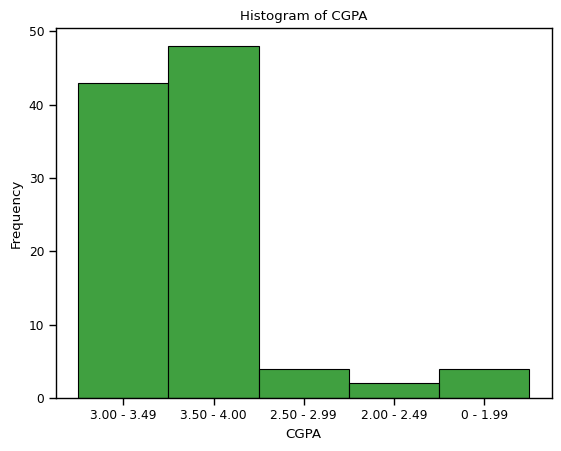

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(mental_health['What is your CGPA?'], color='g')
sns.set_context("paper", rc={"figure.figsize": (15, 6)})
plt.title('Histogram of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

## **Exercise 2**

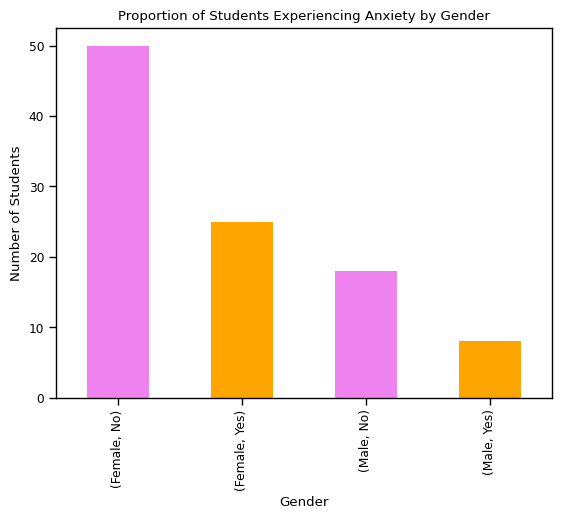

In [74]:
grouped_data = mental_health.groupby(['Choose your gender', 'Do you have Panic attack?']).size()
grouped_data.plot(kind='bar', stacked=True, color=['violet', 'orange'])
plt.title('Proportion of Students Experiencing Anxiety by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

## **Exercise 3**

    Age  No  Yes
0  18.0  23    9
1  19.0  12    9
2  20.0   5    1
3  21.0   4    0
4  22.0   2    0
5  23.0   8    5
6  24.0  14    9


Text(0, 0.5, 'Number of Students')

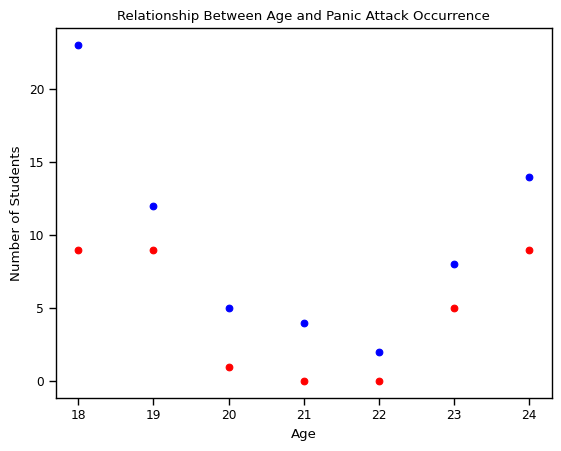

In [94]:
cross_tab = pd.crosstab(mental_health['Age'], mental_health['Do you have Panic attack?'])
cross_tab.columns = ['No', 'Yes']
cross_tab.reset_index(inplace=True)
print(cross_tab)
plt.scatter(cross_tab['Age'], cross_tab['Yes'], label='Yes', color='r')
plt.scatter(cross_tab['Age'], cross_tab['No'], label='No', color='b')
plt.title('Relationship Between Age and Panic Attack Occurrence')
plt.xlabel('Age')
plt.ylabel('Number of Students')

## **Exercise 4**

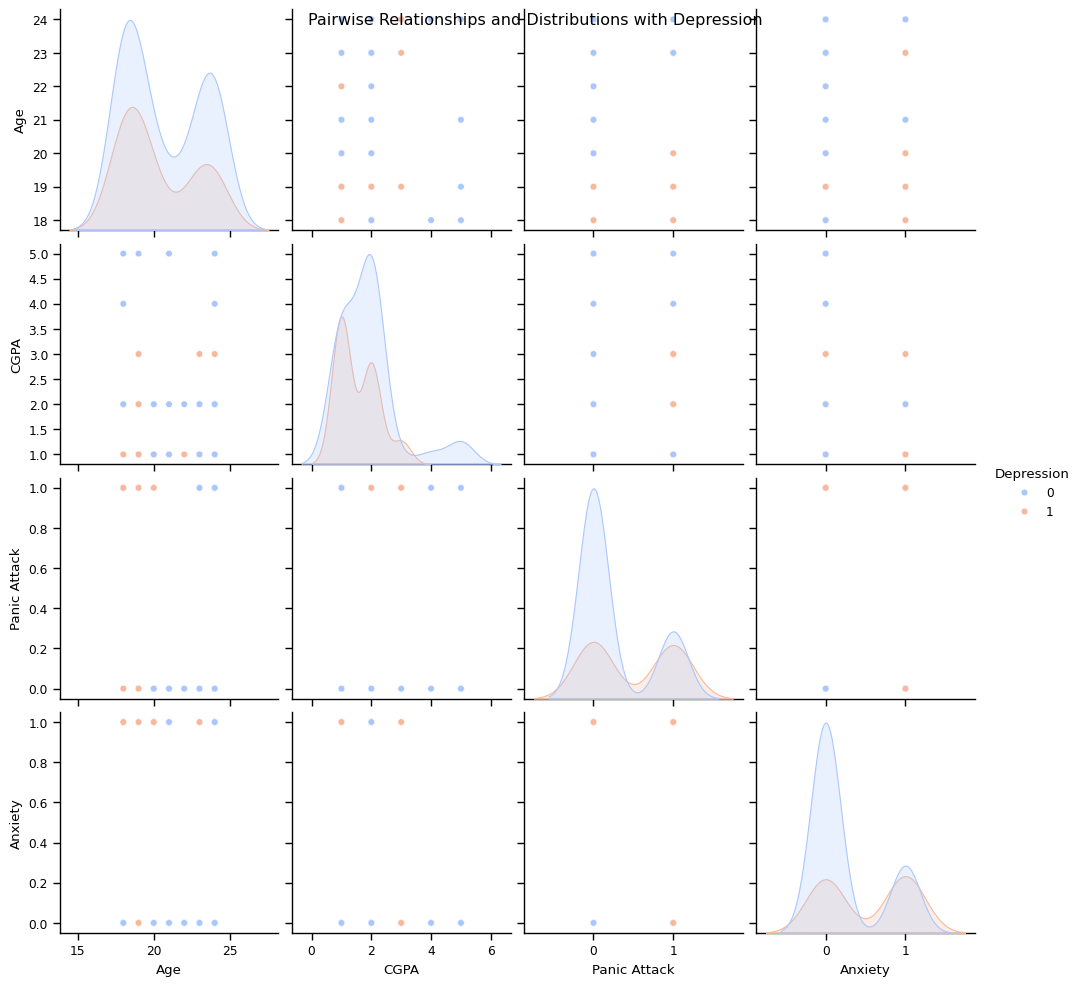

In [115]:
mental_health['Panic Attack'] = mental_health['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})
mental_health['Depression'] = mental_health['Do you have Depression?'].map({'Yes': 1, 'No': 0})
mental_health['Anxiety'] = mental_health['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
mental_health['CGPA'] = mental_health['What is your CGPA?'].map({'3.00 - 3.49': 1, '3.50 - 4.00': 2, '2.50 - 2.99': 3, '2.00 - 2.49': 4, '0 - 1.99': 5})
# # print(mental_health.head())
relevant_columns = ['Age', 'CGPA', 'Panic Attack', 'Depression', 'Anxiety']
subset_mental_health = mental_health[relevant_columns]
sns.pairplot(subset_mental_health, hue='Depression', palette='coolwarm')
plt.suptitle('Pairwise Relationships and Distributions with Depression')
plt.show()

## **Exercise 5**

<ipython-input-117-a1715f20895a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mental_health.corr()


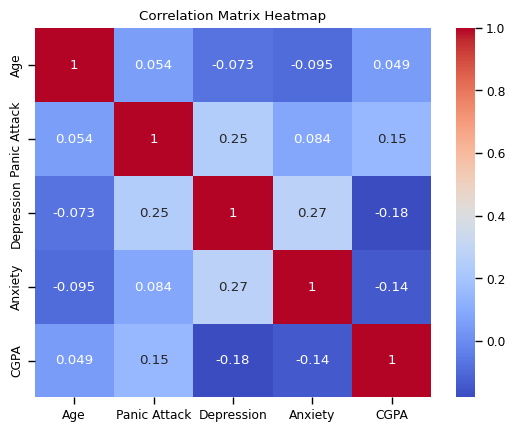

In [117]:
correlation_matrix = mental_health.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

## **Exercise 6**

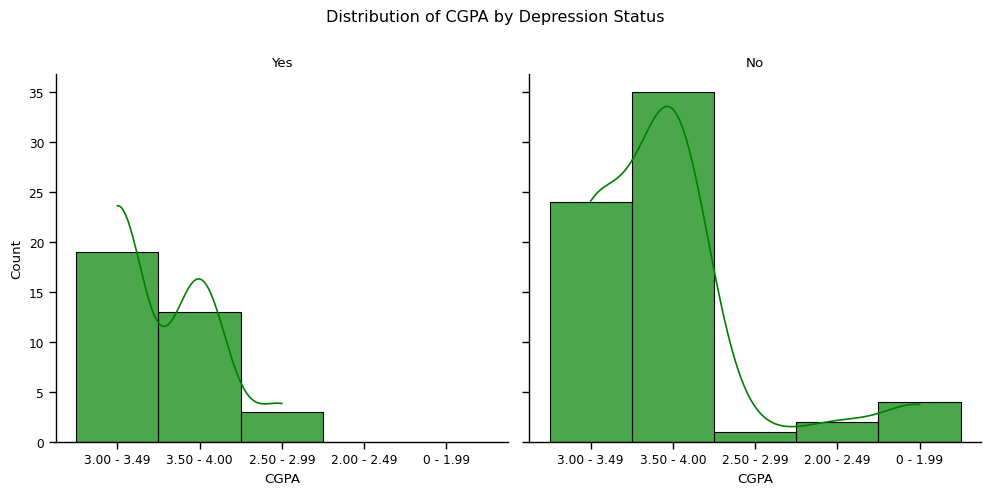

In [122]:

g = sns.FacetGrid(mental_health, col='Do you have Depression?', height=5)
g.map_dataframe(sns.histplot, x='What is your CGPA?', bins=10, kde=True, color='green', alpha=0.7)
g.set_titles(col_template="{col_name}", fontsize=15)
g.set_axis_labels("CGPA", "Count")
plt.subplots_adjust(top=0.85)
plt.suptitle("Distribution of CGPA by Depression Status")
plt.show()